In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder

from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
from keras.preprocessing import sequence 
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Input, Dropout, Activation, Flatten
from keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Bidirectional, MaxPooling1D

Using TensorFlow backend.


In [14]:
X_train_df = pd.read_csv("X_train.csv", index_col=0)
print("Shape of X_train csv/Dataframe: ", X_train_df.shape)
y_train_df = pd.read_csv("y_train.csv", index_col=0)
print("Shape of y_train csv/Dataframe: ", y_train_df.shape)

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y_train_df)
encoded_Y = encoder.transform(y_train_df)
                              
# convert integers to dummy variables (i.e. one hot encoded)
y_dummy_df = pd.DataFrame(np_utils.to_categorical(encoded_Y))

Shape of X_train csv/Dataframe:  (4800, 1000)
Shape of y_train csv/Dataframe:  (4800, 1)


/home/leopold/anaconda3/envs/ml4h/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/leopold/anaconda3/envs/ml4h/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
y_dummy_df

,0,1,2
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
5,0.0,1.0,0.0
6,0.0,0.0,1.0
7,0.0,1.0,0.0
8,0.0,1.0,0.0
9,0.0,1.0,0.0


In [105]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_df, y_dummy_df, test_size=0.15, stratify=y_train_df['y'].values, random_state=42)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_valid: ", X_valid.shape)


X_test_df = pd.read_csv("X_test.csv", index_col=0)
print("Shape of X_test csv/Dataframe: ", X_test_df.shape)

Shape of X_train:  (4080, 1000)
Shape of X_valid:  (720, 1000)
Shape of X_test csv/Dataframe:  (4100, 1000)


In [106]:
y_train._values.shape

(4080, 3)

In [113]:
def baseline_model():
    # Model Definition
    model = Sequential()
    model.add(Dense(1000, activation="relu", input_shape=(1000,)))
    # model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(1000,)))
    model.add(Dropout(0.5))
    model.add(Dense(200, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation="softmax"))
    model.add(Activation('sigmoid'))

    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'], 
                  weighted_metrics=['accuracy'])

    model.summary()
    return model

In [1]:
cls_weights = class_weight.compute_class_weight('balanced', np.unique(y_train._values), y_train._values[:,0])
cls_weight_dict = {0: cls_weights[0], 1: cls_weights[1], 2:cls_weights[2]}
val_sample_weights = class_weight.compute_sample_weight(cls_weight_dict, y_valid._values)

NameError: name 'class_weight' is not defined

In [114]:
#Define Early stopping mechanism
es = EarlyStopping(monitor='val_loss', mode='max', patience=5, verbose=1)

# Train model
estimator = KerasClassifier(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0, callbacks=[es])
model=baseline_model()
model_output = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1,
                         validation_data=(X_valid, y_valid))

# Predict model
y_pred = model.predict(X_valid, batch_size=32, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 200)               200200    
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 3)                 603       
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 1,201,803
Trainable params: 1,201,803
Non-trainable params: 0
_________________________________________________________________


ValueError: Error when checking target: expected activation_2 to have shape (None, 1) but got array with shape (4080, 3)

In [83]:
y_pred

array([[3.7314897e-21, 1.0000000e+00, 2.7542107e-21, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.3748559e-12, 1.0000000e+00, 4.6336012e-12, ..., 3.9948556e-27,
        7.1832079e-27, 2.9739061e-26],
       [1.6512897e-22, 1.0000000e+00, 9.0504270e-23, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.9341671e-05, 9.9677026e-01, 3.2103786e-03, ..., 4.5839695e-12,
        2.0947989e-12, 3.7539507e-12],
       [1.1986635e-02, 8.1816268e-01, 1.6983916e-01, ..., 7.8294858e-07,
        8.0414952e-07, 1.3047085e-06],
       [4.7336780e-05, 9.9994981e-01, 2.8034358e-06, ..., 1.0918275e-13,
        2.2373295e-13, 3.8815850e-13]], dtype=float32)

In [80]:
BMAC = balanced_accuracy_score(y_valid, y_pred.round(0))

Train on 4080 samples, validate on 720 samples
Epoch 1/50
4080/4080 [==============================] - 6s 1ms/step - loss: 0.6522 - acc: 0.7527 - weighted_acc: 0.7527 - val_loss: 0.9073 - val_acc: 0.7764 - val_weighted_acc: 0.5580
Epoch 2/50
4080/4080 [==============================] - 7s 2ms/step - loss: 0.5042 - acc: 0.7971 - weighted_acc: 0.7971 - val_loss: 0.9663 - val_acc: 0.7653 - val_weighted_acc: 0.5932
Epoch 3/50
4080/4080 [==============================] - 7s 2ms/step - loss: 0.4610 - acc: 0.8154 - weighted_acc: 0.8154 - val_loss: 0.9412 - val_acc: 0.8139 - val_weighted_acc: 0.5963
Epoch 4/50
4080/4080 [==============================] - 5s 1ms/step - loss: 0.4151 - acc: 0.8368 - weighted_acc: 0.8368 - val_loss: 0.9340 - val_acc: 0.8097 - val_weighted_acc: 0.6593
Epoch 5/50
4080/4080 [==============================] - 4s 1ms/step - loss: 0.3788 - acc: 0.8461 - weighted_acc: 0.8461 - val_loss: 1.0543 - val_acc: 0.8042 - val_weighted_acc: 0.5796
Epoch 6/50
4080/4080 [===========

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [ ]:
metric_list = model.evaluate(X_valid, y_valid, batch_size=32, verbose=1, 
                             sample_weight=val_sample_weights)
print('sklearn_accuracy=%.3f' %sklearn_accuracy)
print('sklearn_weighted_accuracy=%.3f' %sklearn_weighted_accuracy)
print('keras_evaluate_accuracy=%.3f' %metric_list[1])
print('keras_evaluate_weighted_accuracy=%.3f' %metric_list[2])

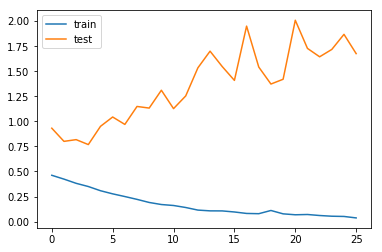

In [75]:
plt.plot(model_output.history['loss'], label='train')
plt.plot(model_output.history['val_loss'], label='test')
plt.legend()
plt.show()